In [173]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
train_df = pd.read_csv("train.csv", parse_dates=['fecha'])

# train.csv

* **id** - 254099, **Entero**
* **titulo** - "condominio horizontal...", **string**
* **descripcion** - "lo que sea", **String**
* **tipoDePropiedad** - Apartamento-Casa en condominio, **debería ser tipo en enum**
* **direccion** - "av. mexico", **String**
* **ciudad** - "Benito Juarez", **String**
* **provincia** - "Distrito Federal", **String**
* **antiguedad** - 10.0, Años **Decimal**
* **habitaciones** - 2.0, **Decimal**
* **garages** -  1.0, **Decimal**
* **idZona** - 23533.0, **Decimal**
* **lat** - 19.310205, **muchos numeros después de la coma**
* **ing** - -99.227655, **esto es la long**
* **fecha** - 2015-08-23 00:00:00, es un **datetime**
* **gimnasio** - 1.0 o 0.0, **verdadero o falso**
* **usosMultiples** - 1.0 o 0.0, **verdadero o falso**
* **piscina** - 1.0 o 0.0, **verdadero o falso**
* **escuelasCercanas** - 1.0 o 0.0, **verdadero o falso**
* **precio** - 2273000.0, en pesos Mexicanos

In [174]:
train_df.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                       object
direccion                             object
ciudad                                object
provincia                             object
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                             float64
usosmultiples                        float64
piscina                              float64
escuelascercanas                     float64
centroscomercialescercanos           float64
precio    

# ---------------------------------------------

Voy a filtrar todo lo que no sea una **Casa** y luego quedarme solamente con las columnas **piscina** y **precio**

In [175]:
piscinasEnCasasDf = train_df.loc[train_df["tipodepropiedad"] == "Casa", ["piscina", "precio"]].groupby([train_df["piscina"]]).agg({"piscina" : "piscina", "piscina": ["count"], "precio": "mean"})

In [176]:
piscinasEnCasasDf.columns = ["cantidad", "precioPromedio"]

In [177]:
piscinasEnCasasDf = piscinasEnCasasDf.reset_index()

In [178]:
piscinasEnCasasDf["piscina"] = piscinasEnCasasDf["piscina"].apply(lambda x : "Tiene piscina" if x == 1 else "No tiene piscina")

Obtengo el siguiente DF

In [179]:
piscinasEnCasasDf.head()

,piscina,cantidad,precioPromedio
0,No tiene piscina,132608,2363569.16
1,Tiene piscina,9109,2901694.73


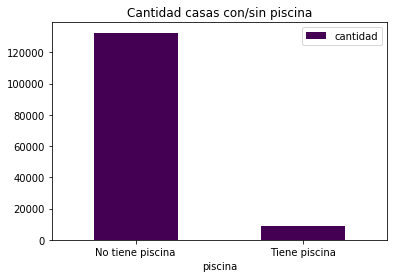

In [180]:
piscinasEnCasasDf.plot.bar(x="piscina", y="cantidad", rot=0, title = "Cantidad casas con/sin piscina",colormap='viridis')

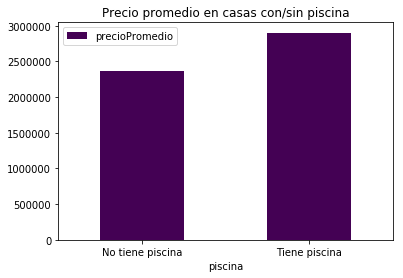

In [181]:
piscinasEnCasasDf.plot.bar(x="piscina", y="precioPromedio", rot=0, title = "Precio promedio en casas con/sin piscina", colormap="viridis")

Pero esto de arriba no me dice nada porque hay **muy pocas casas con piscina**

Voy a ver si encuentro algun atributo donde haya cantidades más parejas, y ver si hay alguna diferencia notable